In [32]:
# change dir because notebook is in a child directory of the root directory (and does not find my modules)
import os 
try:
    os.chdir(r'/Users/joan/code/python/jokes-app')
except FileNotFoundError:
    os.chdir(r'/home/repos/joke-app')

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
import src.api.src.db.core as db
try:
    from src.api.src.db.secret import (
        HOST_OVH as HOST, 
        POSTGRES_USER, 
        POSTGRES_PASSWORD_OVH as POSTGRES_PASSWORD, 
        SCHEMA_NAME
    )
except ImportError:
    from src.api.src.db.secret import HOST, POSTGRES_USER, POSTGRES_PASSWORD, SCHEMA_NAME

### Get connection to Postgres DB

In [35]:
conn = db.connect(host=HOST, user=POSTGRES_USER, password=POSTGRES_PASSWORD, schema_name=SCHEMA_NAME)

### Get Number of subscribed users and unsubscribed users

In [36]:
df = db.execute_read(conn, "select * from users_mail")

In [37]:
n_subbed = df["deleted_at"].isna().sum()
n_unsubbed = len(df) - n_subbed

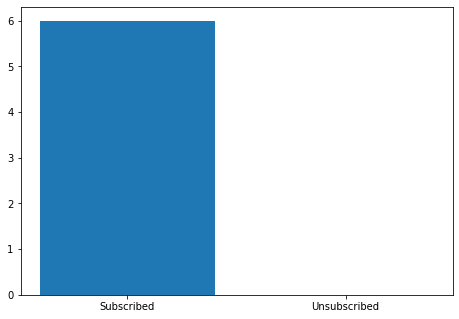

In [38]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
l_bars = ['Subscribed', 'Unsubscribed']
ax.bar(l_bars, [n_subbed, n_unsubbed])
plt.show()

### Rating Statistics

In [39]:
df_ratings = db.execute_read(conn, """select joke_id, rating, created_at from ratings where "source" = 'mail'""")

#### Get last 10 ratings

In [40]:
df_ratings.tail(10)

,joke_id,rating,created_at
38,198,2.5,2019-11-01 08:54:54.266233
39,198,5.0,2019-11-04 07:28:09.955561
40,140,7.5,2019-11-04 07:30:49.339238
41,140,10.0,2019-11-04 07:32:35.974685
42,140,7.5,2019-11-04 07:33:42.714198
43,140,5.0,2019-11-04 09:55:53.269481
44,41,7.5,2019-11-05 07:37:48.255108
45,41,0.0,2019-11-05 07:38:13.912179
46,41,7.5,2019-11-05 07:39:44.811829
47,41,7.5,2019-11-05 08:15:27.859408


### Get mean of ratings by joke and day

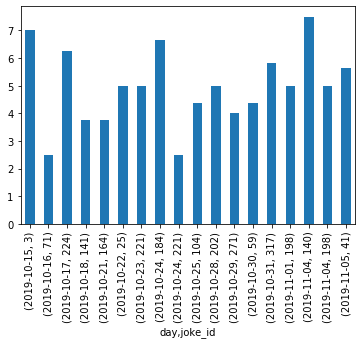

In [41]:
df_ratings["day"] = df_ratings["created_at"].dt.strftime('%Y-%m-%d')
df_ratings.groupby(["day", "joke_id"])["rating"].mean().plot.bar(x="day", y="rating")

### Get Std Deviation of ratings by joke and day

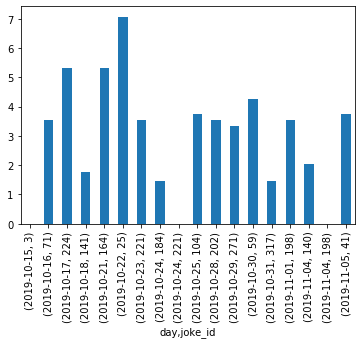

In [42]:
df_ratings.groupby(["day", "joke_id"])["rating"].std().plot.bar(x="day", y="rating")